# **Web and Social Media Analytics Capstone Project**

***Connecting the Collab Notebook to the Drive:***

In [1]:
## Connecting to my drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


***Importing all the required libraries in the entire project:***

In [2]:
# Importing libraries for Steps 1 2 and 3
import pandas as pd
import numpy as np
import gzip
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import nltk
nltk.download('punkt')

# importing libraries for text analytics
import nltk
nltk.download('wordnet')
import nltk
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
pd.set_option('max_colwidth', 100)
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import itertools


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
# Importing libraries for Step 4(Model Building)
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

In [ ]:
# Reading the meta data
# importing libraries

import gzip
import shutil

In [ ]:
# Reading the meta data
# importing libraries

import gzip
import shutil

#Path to the meta data zip file. 'sentiment_analysis' is the folder name under 'My Drive'
path1 = '/content/drive/My Drive/Web_and_social_media_analytics/meta_Cell_Phones_and_Accessories.json.gz'

# Path to meta data .json file
path2 = '/content/drive/My Drive/Capstone_Project_Files/meta_Cell_Phones_and_Accessories.json'


In [ ]:
# Unzipping the meta data file
with gzip.open(path1, 'rb') as f_in:
    with open(path2, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [ ]:
# Reading the unzipped meta data into a Python list. The result will be a list of dictionaries.
import json

# Empty list to store the dictonaries
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open(path2, 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))

In [ ]:
# Getting the number of entries in the phonemetadata list
len(phonemetadata)

590071

In [ ]:
#converting the list phonemetadata into a data frame
df_meta=pd.DataFrame(phonemetadata)
df_meta.head()

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,"[Cell Phones & Accessories, Accessories, Scree...",,[],,Trollies Sing a Long Party VHS,[],[],,,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,,,,6303195164
1,"[Cell Phones & Accessories, Accessories, Car A...",,[],,La Pura VHS,[],[],,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,,,,630524412X
2,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[New items to give you a new good mood, welcom...",,Leopard Thanksgiving Easter PC Black Case for ...,[],[],,,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,,,,6310200240
3,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,Puppies Faceplate Hard Case Protector for Net1...,[],[],,Live2Pedal,[Protect your phone with style through this At...,"[>#6,368,825 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501710
4,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,White Wolf Faceplate Protector Hard Case for S...,[],[],,wirelessoutletusa,[Protect your phone with style through this At...,"[>#2,672,454 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501273


In [ ]:
#Reading the .csv file of the phone data into a dataframe

df_phonedata = pd.read_csv('/content/drive/My Drive/Web_and_social_media_analytics/Cell_Phones_and_Accessories_5.csv')

<ipython-input-10-4cf3198b14b2>:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_phonedata = pd.read_csv('/content/drive/My Drive/Web_and_social_media_analytics/Cell_Phones_and_Accessories_5.csv')


In [ ]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,POSITIVE


In [ ]:
df_phonedata.to_csv('/content/drive/My Drive/Capstone_Project_Files/Cell_Phones_and_Accessories_5_Processed.csv')

# **Step 1: Data pre-processing**

**Pre-processing dataset with the data about the phone containing consumer activity information**

In [ ]:
## Pre-processing dataset with the data about the phone
df_phonedata.head()

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,POSITIVE


In [ ]:
df_phonedata['unixReviewTime'].head()
## Review time is in unix format

0    1407110400
1    1392163200
2    1391817600
3    1391472000
4    1391385600
Name: unixReviewTime, dtype: int64

In [ ]:
# Converting unix review time to date-time format

#Transforming unixReview time to date time format
from datetime import datetime, timedelta
df_phonedata['Date&Time'] = df_phonedata['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))


In [ ]:
df_phonedata['Date&Time'].head()

0    2014-08-03
1    2014-02-11
2    2014-02-07
3    2014-02-03
4    2014-02-02
Name: Date&Time, dtype: object

In [ ]:
# checking the dataset shape
df_phonedata.shape


(1128437, 13)

In [ ]:
# Checking the information related to each column details
df_phonedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1128437 non-null  float64
 1   verified          1128437 non-null  bool   
 2   reviewerID        1128437 non-null  object 
 3   asin              1128437 non-null  object 
 4   style             605241 non-null   object 
 5   reviewerName      1128281 non-null  object 
 6   reviewText        1127669 non-null  object 
 7   summary           1127912 non-null  object 
 8   unixReviewTime    1128437 non-null  int64  
 9   vote              92034 non-null    object 
 10  image             27107 non-null    object 
 11  review_sentiment  1128437 non-null  object 
 12  Date&Time         1128437 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 104.4+ MB


In [ ]:
# saving the vote column along with related asin for further analysis
users_vote= df_phonedata[['asin', 'vote']]
users_vote.head()


,asin,vote
0,7508492919,NaN
1,7508492919,NaN
2,7508492919,NaN
3,7508492919,NaN
4,7508492919,NaN


In [ ]:
## Calculating the number of total columns in dataset
len(df_phonedata)

1128437

In [ ]:
## Calculating the unique number is asin values
len(df_phonedata["asin"].value_counts())

48186

In [ ]:
## Percentage of null values for each feature
(df_phonedata.isnull().sum())/len(df_phonedata)*100

overall              0.000000
verified             0.000000
reviewerID           0.000000
asin                 0.000000
style               46.364662
reviewerName         0.013824
reviewText           0.068059
summary              0.046525
unixReviewTime       0.000000
vote                91.844117
image               97.597828
review_sentiment     0.000000
Date&Time            0.000000
dtype: float64

In [ ]:
# We can assume the  null entries of vote feature as 0 votes
df_phonedata['vote'].fillna(0,inplace=True)

In [ ]:
## Droping the columns with more than 40% null values
df_phonedata.drop(columns=['style', 'image'], axis=1, inplace=True)

In [ ]:
## Percentage of null values for each feature
(df_phonedata.isnull().sum())/len(df_phonedata)*100

overall             0.000000
verified            0.000000
reviewerID          0.000000
asin                0.000000
reviewerName        0.013824
reviewText          0.068059
summary             0.046525
unixReviewTime      0.000000
vote                0.000000
review_sentiment    0.000000
Date&Time           0.000000
dtype: float64

In [ ]:
# Number of null values for each feature
(df_phonedata.isnull().sum())

overall               0
verified              0
reviewerID            0
asin                  0
reviewerName        156
reviewText          768
summary             525
unixReviewTime        0
vote                  0
review_sentiment      0
Date&Time             0
dtype: int64

**Insights:**
* *If review text is null then it's not going to usefull to perform sentiment analysis, so we will drop rows having reviewtext as null.*

In [ ]:
# droping the rows with null counts
df_phonedata = df_phonedata[~df_phonedata['reviewText'].isnull()]

In [ ]:
## Percentage of null values for each feature
(df_phonedata.isnull().sum())/len(df_phonedata)*100

overall             0.000000
verified            0.000000
reviewerID          0.000000
asin                0.000000
reviewerName        0.013745
reviewText          0.000000
summary             0.042034
unixReviewTime      0.000000
vote                0.000000
review_sentiment    0.000000
Date&Time           0.000000
dtype: float64

**Pre-processing dataset with data containing all the product information.**

In [ ]:
df_meta.head()

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,"[Cell Phones & Accessories, Accessories, Scree...",,[],,Trollies Sing a Long Party VHS,[],[],,,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,,,,6303195164
1,"[Cell Phones & Accessories, Accessories, Car A...",,[],,La Pura VHS,[],[],,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,,,,630524412X
2,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[New items to give you a new good mood, welcom...",,Leopard Thanksgiving Easter PC Black Case for ...,[],[],,,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,,,,6310200240
3,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,Puppies Faceplate Hard Case Protector for Net1...,[],[],,Live2Pedal,[Protect your phone with style through this At...,"[>#6,368,825 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501710
4,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,White Wolf Faceplate Protector Hard Case for S...,[],[],,wirelessoutletusa,[Protect your phone with style through this At...,"[>#2,672,454 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501273


In [ ]:
## All values in category columns
df_meta["category"].value_counts()

[Cell Phones & Accessories, Cases, Holsters & Sleeves]                                                                                                                                                                                                                                                                                                                                                                                                                                                                               156677
[Cell Phones & Accessories, Cases, Holsters & Sleeves, Basic Cases]                                                                                                                                                                                                                                                                                                                                                                                                                         

In [ ]:
# Extracting wheteher the entry is cellphone or something else
df_meta["category_new"] = [l[1] if len(l) > 0 else np.nan for l in df_meta["category"]]
df_meta["category_new"].value_counts()

Cases, Holsters & Sleeves      332570
Accessories                    190950
Cell Phones                      9823
SIM Cards & Prepaid Minutes      1057
Mobile Broadband                   65
Featured Categories                 1
Name: category_new, dtype: int64

In [ ]:
## Extracting only files having category as Cell Phones
df_meta=df_meta[df_meta["category_new"]=="Cell Phones"]

In [ ]:
df_meta.head()

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,category_new
36,"[Cell Phones & Accessories, Cell Phones, Unloc...",,"[ICE CENIOR *SENIOR PHONE*, QUAD BAND Super bi...",,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],[https://images-na.ssl-images-amazon.com/image...,,Ice,"[2G NETWORK, Quad Band: GSM 850/900/1800/1900 ...","[>#6,356,920 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,8050110508,Cell Phones
1274,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[Standard package: 1 x original phone 1 x Qual...,,Nokia 3310 Blue Nokia,"[B075FL4H89, B00R25GJJW]",[https://images-na.ssl-images-amazon.com/image...,,Nokia,"[GSM 900/1800, Simple and elegant, Classic mod...","[>#32,759 in Electronics (See Top 100 in Elect...","[B075FL4H89, B075FKZMR2, B00TLWTJLO, B0757B64H...",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","October 19, 2014",,B00005KBGR,Cell Phones
1295,"[Cell Phones & Accessories, Cell Phones]",,[The Nokia 5180i is a handset offered by TracF...,,Nokia 5180i TracFone Prepaid Cell Phone with 1...,[],[https://images-na.ssl-images-amazon.com/image...,,Nokia,[],[],[],{},Cell Phones & Accessories,,,,B00005S0M4,Cell Phones
1354,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Based on Motorola&#x92;s i90c phone, the i95c...",,Motorola i95cl Phone (Nextel),[],[https://images-na.ssl-images-amazon.com/image...,,,[],"[>#3,798,962 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B00006J9HH,Cell Phones
1361,"[Cell Phones & Accessories, Cell Phones, Carri...",,[This is a GSM Samsung R225 cellular phone tha...,,T-Mobile Dual-Band Wireless Phone,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#5,552,033 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B00006LIQB,Cell Phones


In [ ]:
## Need to drop category column as we already created new column category_new based of cell
df_meta.drop('category', axis=1, inplace= True)

<ipython-input-34-0c087f89c9bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta.drop('category', axis=1, inplace= True)


In [ ]:
# Checking the duplicate asin in metadata
len(df_meta[df_meta.duplicated('asin')])

34

**Insights:**
* *We have 34 columns with duplicate asin values. But, asin values need to be unique.*

In [ ]:
## Dropping duplicates as only unique asin should be present
df_meta = df_meta.drop_duplicates(subset="asin", keep="first")

In [ ]:
len(df_meta)

9789

In [ ]:
## Checking value counts of rank  feature
df_meta["rank"].value_counts()

[]                                                                                                                                                     191
[>#1,586,517 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories), >#15,751 in Cell Phones & Accessories > Unlocked Cell Phones]      7
[>#1,585,650 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories), >#15,750 in Cell Phones & Accessories > Unlocked Cell Phones]      5
[>#355,829 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories), >#4,894 in Cell Phones & Accessories > Unlocked Cell Phones]         4
[>#1,586,127 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories), >#15,748 in Cell Phones & Accessories > Unlocked Cell Phones]      4
                                                                                                                                                      ... 
[>#788,565 in Cell Phones & Accessories (See Top 100 in Cell Phones & 

In [ ]:
## Checking columns that have null values in rank column
def contains_empty_value(lst):
    return len(lst) == 0 or "[]" in lst
len(df_meta[df_meta["rank"].apply(contains_empty_value)])

191

In [ ]:
## Checking the value counts in feature column
df_meta["feature"].value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [ ]:
## Checking columns that have null values in rank column
def contains_empty_value(lst):
    return len(lst) == 0 or "[]" in lst
len(df_meta[df_meta["feature"].apply(contains_empty_value)])

1360

In [ ]:
## Checking the value counts of price column
df_meta["price"].value_counts()

**Insights:**
* *Here, we see that the price column has descriptive text, null values as well as "$" in many rows.*
* *This has made the column in string format, but the price column must be numeric for analysis.*

In [ ]:
## Imputing null where price has descriptive text
df_meta["price"]=[np.nan if len(str(x))>15 else x for x in df_meta["price"]]

In [ ]:
## Checking the value counts of price column
df_meta["price"].value_counts()

           8046
$40.08      133
$27.57      129
$16.00       44
$49.99       38
           ... 
$159.06       1
$82.00        1
$272.98       1
$37.28        1
$75.24        1
Name: price, Length: 723, dtype: int64

In [ ]:
## Removing the $ from the price column.
df_meta["price"]= df_meta["price"].str.replace("$",'')

<ipython-input-45-e5452e8f3e88>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_meta["price"]= df_meta["price"].str.replace("$",'')


In [ ]:
## Checking null values in price column
df_meta["price"].value_counts()


          8046
40.08      133
27.57      129
16.00       44
49.99       38
          ... 
159.06       1
82.00        1
272.98       1
37.28        1
75.24        1
Name: price, Length: 723, dtype: int64

In [ ]:
## Via error encountered while converting price column to numeric, we found price column also has ","
## Removing "," from price column
df_meta["price"]= df_meta["price"].str.replace(",",'')


In [ ]:
## Converting price column from object to numeric dtype
df_meta['price']= pd.to_numeric(df_meta['price'], errors='coerce')

In [ ]:
# Checking the overall null values in price column
df_meta["price"].isnull().sum()

8092

In [ ]:
# Checking the overall percentage of null values in price column
(df_meta["price"].isnull().sum()/len(df_meta["price"]))*100

82.66421493513127

**Insights:**
* *We see that about 82% of price column contains null values.*
* *BUT, since price is an important factor we cannot drop it. Instead, we impute it with thw mean price of it's respective brand.*

In [ ]:
## Checking the brand wise null value
df_meta[df_meta["price"].isnull()]['brand'].value_counts()

Samsung         1209
LG               616
Motorola         591
Nokia            452
BLU              440
                ... 
Social Drive       1
MYSAGA             1
GoPro              1
LSoug              1
BEISTE             1
Name: brand, Length: 874, dtype: int64

In [ ]:

# Imputing null price with their brand's mean price
df_meta['price'] = df_meta['price'].fillna(df_meta.groupby('brand')['price'].transform('mean'))

In [ ]:
# Checking the overall percentage of null values in price column
(df_meta["price"].isnull().sum()/len(df_meta["price"]))*100

21.023597916028194

In [ ]:
df_meta[df_meta["price"].isnull()].head()

,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,category_new
36,,"[ICE CENIOR *SENIOR PHONE*, QUAD BAND Super bi...",,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],[https://images-na.ssl-images-amazon.com/image...,,Ice,"[2G NETWORK, Quad Band: GSM 850/900/1800/1900 ...","[>#6,356,920 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,NaN,8050110508,Cell Phones
1411,,[],,"Sierra AIRCARD 750 GPRS W/VOICE 1100091, (Unlo...",[],[],,Sierra Wireless Data Inc.,[],"[>#7,227,749 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,NaN,B00009ETU4,Cell Phones
1425,,[Siemens&#146;s SX56 is a combination cell pho...,,Siemens SX56 - Smartphone - GSM - touch - Wind...,[],[https://images-na.ssl-images-amazon.com/image...,,Siemens Smartphone GSM,[Siemens SX56 - Smartphone - GSM - touch - Win...,"[>#4,503,269 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,NaN,B00009R8S6,Cell Phones
1763,,[],,Boost mobile 32k starter kit,[],[],,Boost,[],"[>#5,934,698 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,NaN,B0002Y6A4E,Cell Phones
1766,,[You demand more from your phone. Voq Professi...,,Sierra Wireless Voq Professional Phone w/VoqMa...,[],[],,Sierra Wireless,[Unlocked for use with your existing GSM servi...,"[>#3,649,732 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,NaN,B0002Z9AIQ,Cell Phones


In [ ]:
df_meta.head()

,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,category_new
36,,"[ICE CENIOR *SENIOR PHONE*, QUAD BAND Super bi...",,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],[https://images-na.ssl-images-amazon.com/image...,,Ice,"[2G NETWORK, Quad Band: GSM 850/900/1800/1900 ...","[>#6,356,920 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,NaN,8050110508,Cell Phones
1274,,[Standard package: 1 x original phone 1 x Qual...,,Nokia 3310 Blue Nokia,"[B075FL4H89, B00R25GJJW]",[https://images-na.ssl-images-amazon.com/image...,,Nokia,"[GSM 900/1800, Simple and elegant, Classic mod...","[>#32,759 in Electronics (See Top 100 in Elect...","[B075FL4H89, B075FKZMR2, B00TLWTJLO, B0757B64H...",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","October 19, 2014",92.513680,B00005KBGR,Cell Phones
1295,,[The Nokia 5180i is a handset offered by TracF...,,Nokia 5180i TracFone Prepaid Cell Phone with 1...,[],[https://images-na.ssl-images-amazon.com/image...,,Nokia,[],[],[],{},Cell Phones & Accessories,,,92.513680,B00005S0M4,Cell Phones
1354,,"[Based on Motorola&#x92;s i90c phone, the i95c...",,Motorola i95cl Phone (Nextel),[],[https://images-na.ssl-images-amazon.com/image...,,,[],"[>#3,798,962 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,140.100556,B00006J9HH,Cell Phones
1361,,[This is a GSM Samsung R225 cellular phone tha...,,T-Mobile Dual-Band Wireless Phone,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#5,552,033 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,117.247465,B00006LIQB,Cell Phones


In [ ]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 36 to 590019
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tech1         9789 non-null   object 
 1   description   9789 non-null   object 
 2   fit           9789 non-null   object 
 3   title         9789 non-null   object 
 4   also_buy      9789 non-null   object 
 5   image         9789 non-null   object 
 6   tech2         9789 non-null   object 
 7   brand         9789 non-null   object 
 8   feature       9789 non-null   object 
 9   rank          9789 non-null   object 
 10  also_view     9789 non-null   object 
 11  details       9789 non-null   object 
 12  main_cat      9789 non-null   object 
 13  similar_item  9789 non-null   object 
 14  date          9789 non-null   object 
 15  price         7731 non-null   float64
 16  asin          9789 non-null   object 
 17  category_new  9789 non-null   object 
dtypes: float64(1), object(17)

In [ ]:
## Saving the modifies and processed file in order to access them easily for further analysis
df_meta.to_csv('/content/drive/My Drive/Capstone_Project_Files/meta_processed.csv', escapechar='\\',encoding='utf-8')

In [ ]:
## Saving the modifies and processed file in order to access them easily for further analysis
df_phonedata.to_csv('/content/drive/My Drive/Capstone_Project_Files/phonedata_processed.csv',encoding='utf-8')

In [ ]:
## Loading the uploded files to avoid running the entire analysis before each session.
df_meta1=pd.read_csv("/content/drive/My Drive/Capstone_Project_Files/meta_processed.csv",index_col=0,encoding='utf-8')


In [ ]:
## Loading the uploded files to avoid running the entire analysis before each session.
df_phonedata1=pd.read_csv("/content/drive/My Drive/Capstone_Project_Files/phonedata_processed.csv",index_col=0,encoding='utf-8')

<ipython-input-60-893e7de0bfe8>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_phonedata1=pd.read_csv("/content/drive/My Drive/Capstone_Project_Files/phonedata_processed.csv",index_col=0,encoding='utf-8')


In [ ]:
## Checking the percentage of null values in each feature
df_meta1.isnull().sum()/len(df_meta1.index)*100

tech1            99.683318
description       0.000000
fit             100.000000
title             0.000000
also_buy          0.000000
image             0.000000
tech2            99.908060
brand             1.256512
feature           0.000000
rank              0.000000
also_view         0.000000
details           0.000000
main_cat          0.143018
similar_item     70.037798
date             97.589131
price            21.023598
asin              0.000000
category_new      0.000000
dtype: float64

**Insights:**
* *Here, there are many column with more than 70% null values. Meaning, these feature are virtually useless to us.*
* *Let us drop these columns.*

In [ ]:
## Columns with more than 70% null values
More_than_70_null=['fit', 'tech2', 'tech1', 'date', 'similar_item']

In [ ]:
## Dropping columns with more than 70% null values
df_meta1.drop(More_than_70_null,axis=1,inplace=True)

In [ ]:
## Checking the percentage of null values in each feature
df_meta1.isnull().sum()/len(df_meta1.index)*100

description      0.000000
title            0.000000
also_buy         0.000000
image            0.000000
brand            1.256512
feature          0.000000
rank             0.000000
also_view        0.000000
details          0.000000
main_cat         0.143018
price           21.023598
asin             0.000000
category_new     0.000000
dtype: float64

In [ ]:
## Dropping "main_cat" column since we have kept only the cellphone data
df_meta1.drop('main_cat',axis=1,inplace=True)

In [ ]:
## Dropping the "image" column, since we shall only be doing text analysis on the data
df_meta1.drop('image',axis=1,inplace=True)

In [ ]:
df_meta1["rank"].value_counts()
## Checking the elements in the rank column

[]                                                                                                                                                         191
['>#1,586,517 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories)', '>#15,751 in Cell Phones & Accessories > Unlocked Cell Phones']      7
['>#1,585,650 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories)', '>#15,750 in Cell Phones & Accessories > Unlocked Cell Phones']      5
['>#355,829 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories)', '>#4,894 in Cell Phones & Accessories > Unlocked Cell Phones']         4
['>#1,586,127 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories)', '>#15,748 in Cell Phones & Accessories > Unlocked Cell Phones']      4
                                                                                                                                                          ... 
['>#788,565 in Cell Phones & Accessories (See 

In [ ]:
# extracting rank in cellphones and acessories
df_meta1["new_rank"]=df_meta1["rank"].str.extract(pat='([^>#](\d{0,3},)?(\d{3},)?\d{0,3}\s*in Cell Phones & Accessories)')[0]

In [ ]:
## Checking the elements in the new_rank column
df_meta1["new_rank"].value_counts()

1,586,517 in Cell Phones & Accessories    7
1,585,650 in Cell Phones & Accessories    5
355,829 in Cell Phones & Accessories      4
315,838 in Cell Phones & Accessories      4
1,586,127 in Cell Phones & Accessories    4
                                         ..
1,608,198 in Cell Phones & Accessories    1
2,362,039 in Cell Phones & Accessories    1
265,430 in Cell Phones & Accessories      1
2,111,440 in Cell Phones & Accessories    1
880,601 in Cell Phones & Accessories      1
Name: new_rank, Length: 9365, dtype: int64

In [ ]:
## Extracting ONLY the numeric value of the Rank
df_meta1["new_rank"]=df_meta1["new_rank"].str.replace(">#","").str.replace("in Cell Phones & Accessories","").str.replace(",","")

In [ ]:
## Checking the elements in the new_rank column
df_meta1["new_rank"].value_counts()

1586517     7
1585650     5
355829      4
315838      4
1586127     4
           ..
1608198     1
2362039     1
265430      1
2111440     1
880601      1
Name: new_rank, Length: 9365, dtype: int64

In [ ]:
## Converting new_rank column to numeric
df_meta1["new_rank"] = df_meta1["new_rank"].astype("float")

In [ ]:
## Dropping rank column as we got numeric new_rank column
df_meta1.drop("rank",axis=1, inplace=True)

In [ ]:
df_meta1.head()

,description,title,also_buy,brand,feature,also_view,details,price,asin,category_new,new_rank
36,"['ICE CENIOR *SENIOR PHONE*, QUAD BAND Super b...",UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],Ice,"['2G NETWORK, Quad Band: GSM 850/900/1800/1900...",[],{},NaN,8050110508,Cell Phones,6356920.0
1274,['Standard package: 1 x original phone 1 x Qua...,Nokia 3310 Blue Nokia,"['B075FL4H89', 'B00R25GJJW']",Nokia,"['GSM 900/1800', 'Simple and elegant', 'Classi...","['B075FL4H89', 'B075FKZMR2', 'B00TLWTJLO', 'B0...",{},92.513680,B00005KBGR,Cell Phones,NaN
1295,"[""The Nokia 5180i is a handset offered by Trac...",Nokia 5180i TracFone Prepaid Cell Phone with 1...,[],Nokia,[],[],{},92.513680,B00005S0M4,Cell Phones,NaN
1354,"['Based on Motorola&#x92;s i90c phone, the i95...",Motorola i95cl Phone (Nextel),[],NaN,[],[],{},140.100556,B00006J9HH,Cell Phones,3798962.0
1361,['This is a GSM Samsung R225 cellular phone th...,T-Mobile Dual-Band Wireless Phone,[],Samsung,[],[],{},117.247465,B00006LIQB,Cell Phones,5552033.0


In [ ]:
## Understanding Elements of also_view
df_meta1["also_view"].value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          6581
['B079J5VWWK']                                                                                                                                                                                                                                                         

In [ ]:
## Understanding Elements of also_buy
df_meta1["also_buy"].value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            7960
['B072N6BD9V']                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
## Understanding Elements of details
df_meta1["details"].value_counts()

{}                                                                                                                                                                                                                                                                                                                                0.975483
{'\\n    Product Dimensions: \\n    ': '7.5 x 3.9 x 2.8 inches ; 10.6 ounces', 'Shipping Weight:': '6.6 ounces', 'ASIN: ': 'B000HJ16RU', 'Item model number:': 'SN947124D'}                                                                                                                                                       0.000204
{'\\n    Product Dimensions: \\n    ': '3 x 0.4 x 5.8 inches ; 5.4 ounces', 'Shipping Weight:': '12.8 ounces (', 'ASIN:': 'B00YA8308M', 'Item model number:': 'LG-H817'}                                                                                                                                                          0.000102
{'\\n  

In [ ]:
## Saving dataframe for further analysis
df_meta1.to_csv('/content/drive/My Drive/Capstone_Project_Files/meta_processed_final.csv', escapechar='\\',encoding='utf-8')

## **Merging Dataframes**:
### Merging both dataframes having customer details as well as phone metadata.

In [ ]:
## Merging to 2 dataframes for further analysis
df_merged = pd.merge(df_meta1, df_phonedata, how='inner', on=['asin'])


In [ ]:
df_merged.head()

,description,title,also_buy,brand,feature,also_view,details,price,asin,category_new,...,overall,verified,reviewerID,reviewerName,reviewText,summary,unixReviewTime,vote,review_sentiment,Date&Time
0,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,B0000E3GWH,Cell Phones,...,1.0,False,A5JLAU2ARJ0BO,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,2.0,NEGATIVE,2004-09-20
1,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,B0000E3GWH,Cell Phones,...,4.0,False,A1ACM1CBGORBN1,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,15.0,POSITIVE,2004-07-23
2,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,B0000E3GWH,Cell Phones,...,3.0,False,A2V48Q03FZUOSD,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,11.0,NEGATIVE,2004-07-05
3,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,B0000E3GWH,Cell Phones,...,5.0,True,A1V3TRGWOMA8LC,James Beswick,"..and I'm from Europe, where the phones and ne...",The best phone I've ever owned,1081728000,4.0,POSITIVE,2004-04-11
4,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,B0000E3GWH,Cell Phones,...,3.0,False,A3NOBH42C7UI5M,Kepela,This phone is amazingly small and light for a ...,I love the phone but it has some real problems,1077148800,12.0,POSITIVE,2004-02-18


In [ ]:
## Saving the merged dataframe
df_merged.to_csv('/content/drive/My Drive/Capstone_Project_Files/Merged_Dataframe.csv',encoding='utf-8')

In [ ]:
len(df_merged)

63838

In [ ]:
## Checking the elements of verified column
df_merged["verified"].value_counts()

True     54994
False     8844
Name: verified, dtype: int64

In [ ]:
## Converting the verified column to numeric
df_merged["verified"].replace({False: 0, True: 1}, inplace=True)

In [ ]:
## Counting positive and negative instances
pos_neg = df_merged["review_sentiment"].value_counts()
pos_neg

POSITIVE    47677
NEGATIVE    16161
Name: review_sentiment, dtype: int64

In [ ]:
## Saving the merged dataframe for further analysis
df_merged.to_csv('/content/drive/My Drive/Capstone_Project_Files/Merged_Dataframe.csv',encoding='utf-8')

In [ ]:
## Loading the uploded files to avoid running the entire analysis before each session.
df_merged=pd.read_csv("/content/drive/My Drive/Capstone_Project_Files/Merged_Dataframe.csv",index_col=0,encoding='utf-8')
df_merged.head()

,description,title,also_buy,brand,feature,also_view,details,price,asin,category_new,...,overall,verified,reviewerID,reviewerName,reviewText,summary,unixReviewTime,vote,review_sentiment,Date&Time
0,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,B0000E3GWH,Cell Phones,...,1.0,0,A5JLAU2ARJ0BO,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,2.0,NEGATIVE,2004-09-20
1,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,B0000E3GWH,Cell Phones,...,4.0,0,A1ACM1CBGORBN1,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,15.0,POSITIVE,2004-07-23
2,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,B0000E3GWH,Cell Phones,...,3.0,0,A2V48Q03FZUOSD,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,11.0,NEGATIVE,2004-07-05
3,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,B0000E3GWH,Cell Phones,...,5.0,1,A1V3TRGWOMA8LC,James Beswick,"..and I'm from Europe, where the phones and ne...",The best phone I've ever owned,1081728000,4.0,POSITIVE,2004-04-11
4,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,B0000E3GWH,Cell Phones,...,3.0,0,A3NOBH42C7UI5M,Kepela,This phone is amazingly small and light for a ...,I love the phone but it has some real problems,1077148800,12.0,POSITIVE,2004-02-18


In [ ]:
## Counting positive and negative instances
pos_neg = df_merged["review_sentiment"].value_counts()
pos_neg

POSITIVE    47677
NEGATIVE    16161
Name: review_sentiment, dtype: int64

In [ ]:
## Loading the uploded files to avoid running the entire analysis before each session.
df_merged=pd.read_csv("/content/drive/My Drive/Capstone_Project_Files/Merged_Dataframe.csv",index_col=0,encoding='utf-8')
df_merged.head()

,description,title,also_buy,brand,feature,also_view,details,price,asin,category_new,...,overall,verified,reviewerID,reviewerName,reviewText,summary,unixReviewTime,vote,review_sentiment,Date&Time
0,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,B0000E3GWH,Cell Phones,...,1.0,0,A5JLAU2ARJ0BO,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,2.0,NEGATIVE,2004-09-20
1,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,B0000E3GWH,Cell Phones,...,4.0,0,A1ACM1CBGORBN1,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,15.0,POSITIVE,2004-07-23
2,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,B0000E3GWH,Cell Phones,...,3.0,0,A2V48Q03FZUOSD,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,11.0,NEGATIVE,2004-07-05
3,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,B0000E3GWH,Cell Phones,...,5.0,1,A1V3TRGWOMA8LC,James Beswick,"..and I'm from Europe, where the phones and ne...",The best phone I've ever owned,1081728000,4.0,POSITIVE,2004-04-11
4,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},117.247465,B0000E3GWH,Cell Phones,...,3.0,0,A3NOBH42C7UI5M,Kepela,This phone is amazingly small and light for a ...,I love the phone but it has some real problems,1077148800,12.0,POSITIVE,2004-02-18


# **Step 2: Text Analytics**

In [ ]:
# Reading stop words from a text file in to a list
stop_words = [line.rstrip('\n') for line in open('/content/drive/My Drive/Web_and_social_media_analytics/stop_words_long.txt')]


**Insights:**
* *We will use the given corpus of stop words as our stop words instead of using the NLTK library, since, the negation words like "nor, not, never" are considered as stopwords in the library.*
* *Let us also create various functions to automate the pre-processing steps.*

In [ ]:
## Function for removing stop words,making text lower case and also eliminating words with length>2:

stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
def preprocess(document):

    # change sentence to lower case
    document = document.lower()


    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stop_words]


    # take only thos words whose length is greater than 2
    words=[w for w in words if len(w)>2]

    # join words to make sentence
    document = " ".join(words)

    return document

In [ ]:
## Function to remove positive / negative words from document

def remove_words(document):
   # tokenize into words
    words = word_tokenize(document)

    # remove positive/negative words
    words = [word for word in words if word not in positive_words]
    words = [word for word in words if word not in negative_words]

    document = " ".join(words)

    return document

In [ ]:
## Function to remove punctuations
def remove_punctuations(text):
    text = re.sub('[^A-Za-z]+', ' ', text)

    return text

In [ ]:
## Function for applying lemmatizer on words tagged as verbs, making text lower case and also eliminating words with length>2:

stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
def apply_lemmatization(document):
     # tokenize into words
         # change sentence to lower case
    document = document.lower()
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stop_words]

    #apply lemmatization
    words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

    words=[w for w in words if len(w)>2]

    # join words to make sentence
    document = " ".join(words)

    return document

**Cleaning and pre-processing the review column:**

In [ ]:
## Making a new dataframe for only reviews and sentiment
df_review=df_merged[["reviewText","review_sentiment"]]

In [ ]:
## Making a new column to save review text after pre-processing it
df_review["review_text_nostop"] = df_review["reviewText"].apply(preprocess)


<ipython-input-20-b676ad65d1bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review["review_text_nostop"] = df_review["reviewText"].apply(preprocess)


In [ ]:
df_review["review_text_nostop"].head()

0    phone ugly heavy terrible user interface techies like drops calls like crazy manhattan moto v600...
1    samsung v205 decided try e715 fyi people battery problems batteries drain completely charge like...
2    samsung phone not measure-up v300 tmobile customer finally fed v300 terrible camera tmobile sent...
3    europe phones networks better samsung currently best software huge nokia fan amazingly light int...
4    phone amazingly light camera phone flashlight/flash problems phone real problem battery life wor...
Name: review_text_nostop, dtype: object

In [ ]:
## Removing the stop words from "review_text_nostop" column
df_review["review_text_nostop"] = df_review['review_text_nostop'].apply(remove_punctuations)

<ipython-input-23-6c82361f29a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review["review_text_nostop"] = df_review['review_text_nostop'].apply(remove_punctuations)


In [ ]:
## Reading positive words from a text file in to a list
positive_words = [line.rstrip('\n') for line in open('/content/drive/My Drive/Web_and_social_media_analytics/pos_words.txt')]

In [ ]:
## Reading negative words from a text file in to a list
negative_words = [line.rstrip('\n') for line in open('/content/drive/My Drive/Web_and_social_media_analytics/neg_words.txt')]


In [ ]:
## Applying lemmatization for words with p.o.s as verb
df_review["review_text_nostop"]=[apply_lemmatization(x) for x in df_review["review_text_nostop"]]

<ipython-input-26-0363f6e4a130>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review["review_text_nostop"]=[apply_lemmatization(x) for x in df_review["review_text_nostop"]]


In [ ]:
df_review["review_text_nostop"].head()

0    phone ugly heavy terrible user interface techies like drop call like crazy manhattan moto better...
1    samsung decide try fyi people battery problems batteries drain completely charge like build batt...
2    samsung phone not measure tmobile customer finally feed terrible camera tmobile send upgrade goo...
3    europe phone network better samsung currently best software huge nokia fan amazingly light intui...
4    phone amazingly light camera phone flashlight flash problems phone real problem battery life wor...
Name: review_text_nostop, dtype: object

In [ ]:
## Dividing positive and negative review in different dataframes

df_positive = df_review[df_review["review_sentiment"]=="POSITIVE"][["review_text_nostop","review_sentiment"]]
df_negative = df_review[df_review["review_sentiment"]=="NEGATIVE"][["review_text_nostop","review_sentiment"]]

In [ ]:
df_positive.head()

,review_text_nostop,review_sentiment
1,samsung decide try fyi people battery problems batteries drain completely charge like build batt...,POSITIVE
3,europe phone network better samsung currently best software huge nokia fan amazingly light intui...,POSITIVE
4,phone amazingly light camera phone flashlight flash problems phone real problem battery life wor...,POSITIVE
5,see explosion nice color phone market functionalities similar extra bonus bell whistle sell prod...,POSITIVE
6,happy motorola phone battery start lose charge day phone friendly incompetent customer support k...,POSITIVE


In [ ]:
df_negative.head()

,review_text_nostop,review_sentiment
0,phone ugly heavy terrible user interface techies like drop call like crazy manhattan moto better...,NEGATIVE
2,samsung phone not measure tmobile customer finally feed terrible camera tmobile send upgrade goo...,NEGATIVE
12,chicago gps work yes window dozens time surround suburbs work miles north chicago not break unfo...,NEGATIVE
13,not forum people express unhappiness believe reality sprint nextel service problems service rela...,NEGATIVE
20,frank high expectations treo read time lead release actual disappoint front deserve star usable ...,NEGATIVE


In [ ]:
# Review text features for positive and negative sentiments
neg_sentiment_features= df_negative[["review_text_nostop"]]
pos_sentiment_features= df_positive[["review_text_nostop"]]

In [ ]:
neg_sentiment_features.head()

,review_text_nostop
0,phone ugly heavy terrible user interface techies like drop call like crazy manhattan moto better...
2,samsung phone not measure tmobile customer finally feed terrible camera tmobile send upgrade goo...
12,chicago gps work yes window dozens time surround suburbs work miles north chicago not break unfo...
13,not forum people express unhappiness believe reality sprint nextel service problems service rela...
20,frank high expectations treo read time lead release actual disappoint front deserve star usable ...


In [ ]:
pos_sentiment_features.head()

,review_text_nostop
1,samsung decide try fyi people battery problems batteries drain completely charge like build batt...
3,europe phone network better samsung currently best software huge nokia fan amazingly light intui...
4,phone amazingly light camera phone flashlight flash problems phone real problem battery life wor...
5,see explosion nice color phone market functionalities similar extra bonus bell whistle sell prod...
6,happy motorola phone battery start lose charge day phone friendly incompetent customer support k...


In [ ]:
## We can split each term on whitespace since we have removed all punctuations in pre-processing and save as a list
lst_pos= [str(w).split(" ") for w in pos_sentiment_features["review_text_nostop"]]
lst_neg= [str(w).split(" ") for w in neg_sentiment_features["review_text_nostop"]]

In [ ]:
# Flattening the list saving it as a merged list

merged_pos = list(itertools.chain(*lst_pos))
merged_neg = list(itertools.chain(*lst_neg))

In [ ]:
len(merged_pos)

1850581

In [ ]:
len(merged_neg)

254329

In [ ]:
## Creating dataframes for positive and negative features
df_pos = pd.DataFrame({'Positive_Features':merged_pos})
df_neg = pd.DataFrame({'Negative_Features':merged_neg})

In [ ]:
df_pos.head()

,Positive_Features
0,samsung
1,decide
2,try
3,fyi
4,people


In [ ]:
df_neg.head()

,Negative_Features
0,phone
1,ugly
2,heavy
3,terrible
4,user


In [ ]:
## Saving the formed dataframes for further analysis
df_pos.to_csv('/content/drive/My Drive/Capstone_Project_Files/Positive_Features.csv',encoding='utf-8')
df_neg.to_csv('/content/drive/My Drive/Capstone_Project_Files/Negative_Features.csv',encoding='utf-8')
df_review.to_csv('/content/drive/My Drive/Capstone_Project_Files/Review_Dataframe.csv',encoding='utf-8')

In [ ]:
## Loading the uploded files to avoid running the entire analysis before each session.
df_merged=pd.read_csv("/content/drive/My Drive/Capstone_Project_Files/Merged_Dataframe.csv",index_col=0,encoding='utf-8')
df_pos=pd.read_csv('/content/drive/My Drive/Capstone_Project_Files/Positive_Features.csv',index_col=0,encoding='utf-8')
df_neg=pd.read_csv('/content/drive/My Drive/Capstone_Project_Files/Negative_Features.csv',index_col=0,encoding='utf-8')
df_rev=pd.read_csv('/content/drive/My Drive/Capstone_Project_Files/Review_Dataframe.csv',index_col=0,encoding='utf-8')

# **Step 3: Visualisation and storytelling**

### Checking counts of positive and negative table

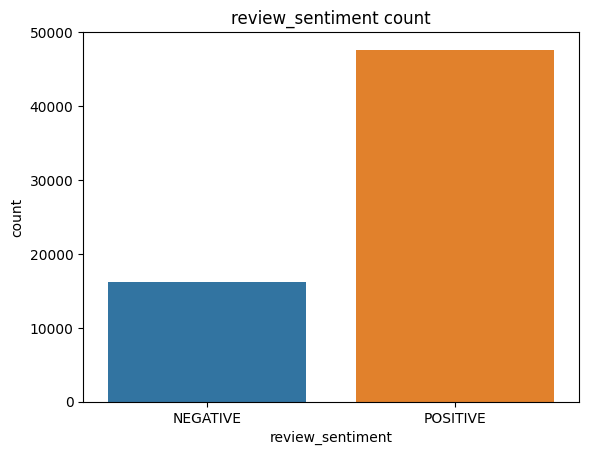

In [ ]:
plt.figure()
plt.title("review_sentiment count")
sns.countplot(data=df_merged, x='review_sentiment')
plt.show()

**Insights:**
* *We see that there is a clear Data Imbalance. The number of positive reviews are muchh more than the negative ones.*

### Proportion of review sentiments with respect to the  overall rating:

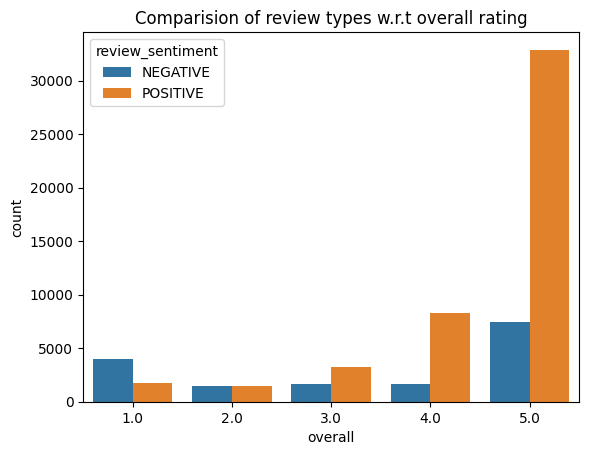

In [ ]:
plt.figure()
sns.countplot(data=df_merged,x=df_merged["overall"],hue=df_merged["review_sentiment"])
plt.title("Count of review sentiment w.r.t overall rating")
plt.show()

**Insights:**
* *We can clearly observe that as the overall rating increases, the proportion of postive review also increases.*

### Top 10 Brands  according to the number of reviews:

In [ ]:
# top 10 brand having the most number of reviews
df_merged['brand'].value_counts()[:10]

Samsung       16195
BLU            9328
LG             6657
Motorola       4922
Nokia          4885
Apple          4049
BlackBerry     3656
HTC            2453
Sony           1556
Huawei         1401
Name: brand, dtype: int64

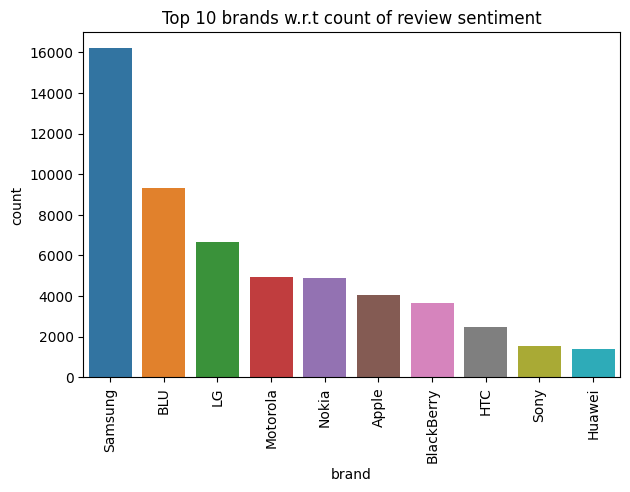

In [ ]:
## Comparing Top 10 brands w.r.t purely count of review sentiment
plt.figure()
sns.countplot(data=df_merged,x=df_merged["brand"],order=df_merged["brand"].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Top 10 brands w.r.t count of review sentiment")
plt.show()

**Insights:**
* *Here, we can see Samsung is evidently the most popular brand followed by BLU, LG and Motorola with respect to the number of reviews as a popularity measure.*

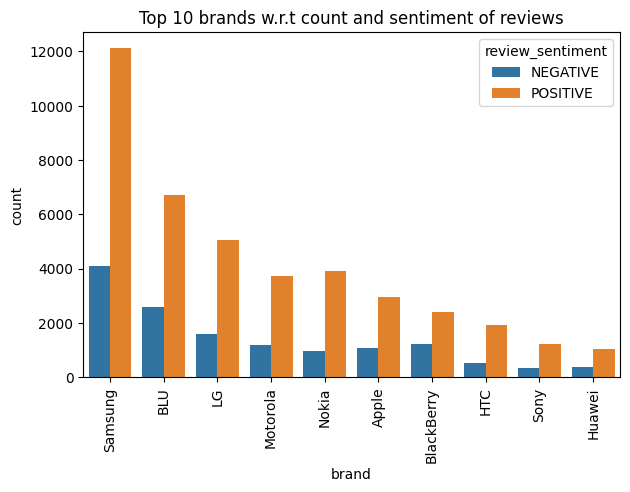

In [ ]:
## Comparing Top 10 brands w.r.t count of positive and negative review sentiment
plt.figure()
sns.countplot(data=df_merged,x=df_merged["brand"],hue=df_merged["review_sentiment"],order=df_merged["brand"].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Top 10 brands w.r.t count and sentiment of reviews")
plt.show()

**Insights:**
* *Here, we observe that the conclusion from assuming number of reviews as a popularity measure holds.*
* *We can see that Samsung is the company with most number of positive reviews followed by BLU, LG and Motorola.*

### Top 10 Brands and their respective Ranks:

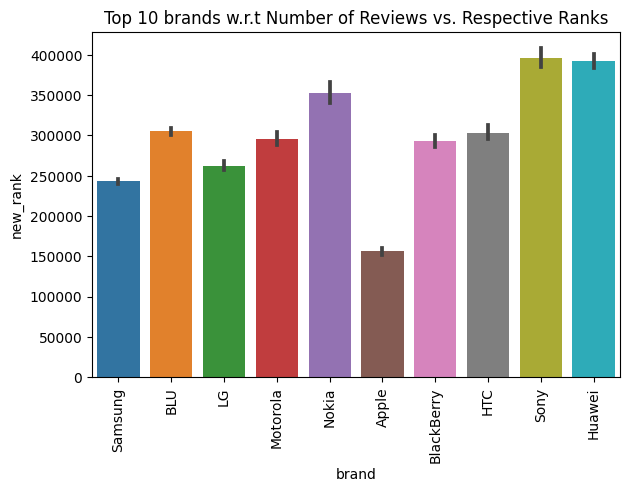

In [ ]:
## Barplot for Top 10 Brands and their respective ranks
plt.figure()
sns.barplot (data=df_merged,x=df_merged["brand"],y=df_merged["new_rank"],order=df_merged["brand"].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Top 10 brands w.r.t Number of Reviews vs. Respective Ranks")
plt.show()

**Insights:**
* *We can see that even though Sony is the 9th most popular Brand, it ranks the highest in Cellphones.*
* *Huawei that is the 10th most popular Brand ranks 2nd in Cellphones.*
* *We can see that the rank decided by the sales performance dosen't necessarily follow the same pattern as the brands' popularity.*

### Proportion of verified and unverified users:

In [ ]:
## Let's check the verified reviews

df_merged["verified"].value_counts()

1    54994
0     8844
Name: verified, dtype: int64

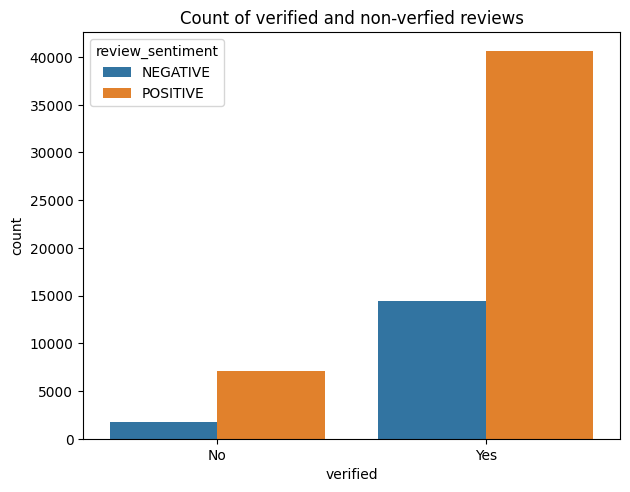

In [ ]:
plt.figure()
sns.countplot(data=df_merged,x=df_merged["verified"],hue=df_merged["review_sentiment"])
plt.xticks(ticks=(0,1),labels=["No","Yes"])
plt.tight_layout()
plt.title("Count of verified and non-verfied reviews")
plt.show()

**Insights:**
* *We can see that majority of the positive as well as negative reviews are verified.*

### Number of Reviews per Year:

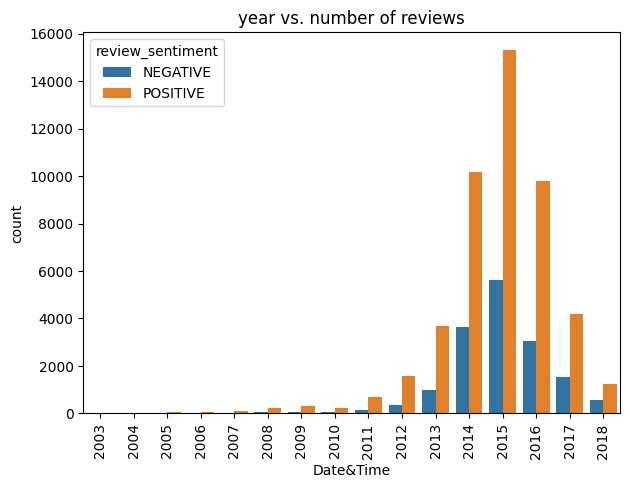

In [ ]:
# Number of reviews per year
plt.figure()
sns.countplot(data=df_merged,x=pd.DatetimeIndex(df_merged['Date&Time']).year,hue=df_merged["review_sentiment"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Number of reviews through the years")
plt.show()

**Insights:**
* *The number of reviews see an upwards trend up peaking in the year 2015.*
* *After which, we see a downwards trend for subsequent 3 years*

### Checking the spread of prices of the Top 10 Brands:

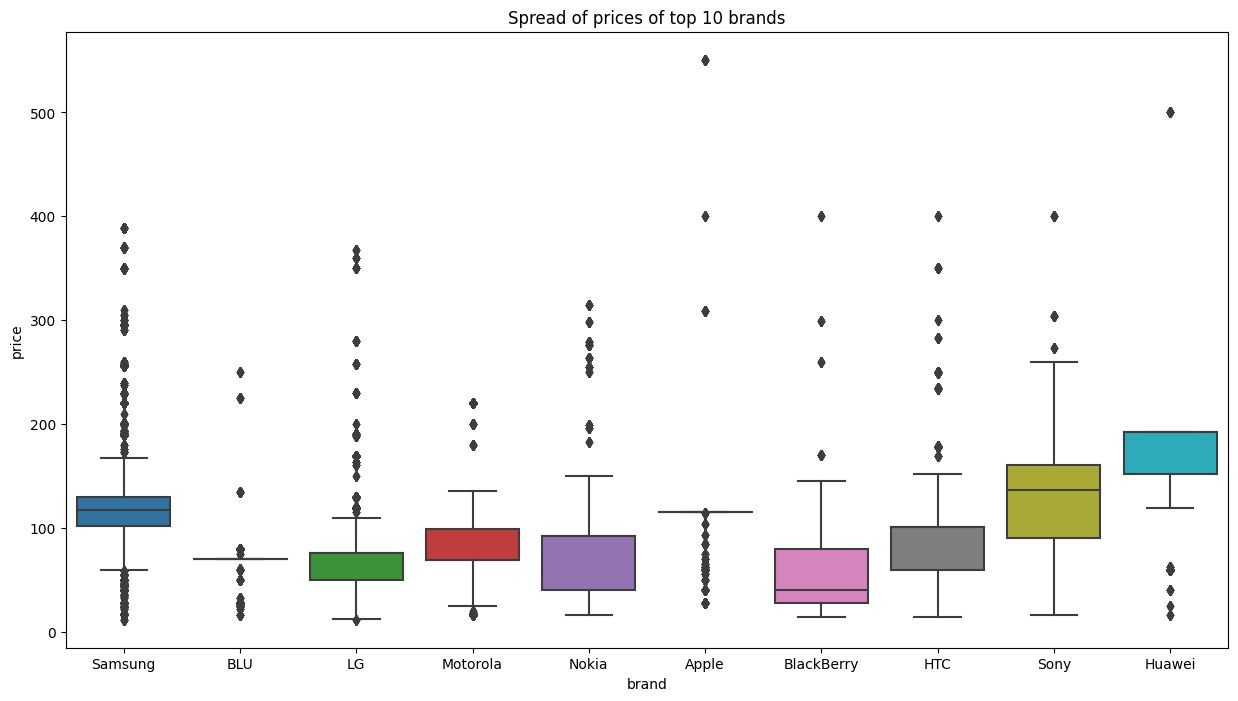

In [ ]:
## BoxPlot of prices of the Top 10 most Popular Brands
plt.figure(figsize=[15,8])
plt.title("Spread of prices of top 10 brands")
sns.boxplot(data=df_merged,x="brand",y="price",order=df_merged["brand"].value_counts().iloc[:10].index)
plt.show()

# **Step 4: Building a sentiment classification engine**

**Text pre-processing for Model:**

In [5]:
df_merged = pd.read_csv('/content/drive/My Drive/Capstone_Project_Files/Merged_Dataframe.csv',index_col=0,encoding='utf-8')

In [6]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63838 entries, 0 to 63837
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   description       63838 non-null  object 
 1   title             63838 non-null  object 
 2   also_buy          63838 non-null  object 
 3   brand             63772 non-null  object 
 4   feature           63838 non-null  object 
 5   also_view         63838 non-null  object 
 6   details           63838 non-null  object 
 7   price             61600 non-null  float64
 8   asin              63838 non-null  object 
 9   category_new      63838 non-null  object 
 10  new_rank          61538 non-null  float64
 11  overall           63838 non-null  float64
 12  verified          63838 non-null  int64  
 13  reviewerID        63838 non-null  object 
 14  reviewerName      63829 non-null  object 
 15  reviewText        63838 non-null  object 
 16  summary           63821 non-null  object

In [7]:
# Counting positive and negative instances
pos_neg = df_merged.review_sentiment.value_counts()
pos_neg

POSITIVE    47677
NEGATIVE    16161
Name: review_sentiment, dtype: int64

In [8]:
print("Positive review rate is about:",(round((pos_neg[0]/float(pos_neg[0]+pos_neg[1]))*100)),"%")

Positive review rate is about: 75 %


In [9]:
print("Negative review rate is about:",(round((pos_neg[1]/float(pos_neg[0]+pos_neg[1]))*100)),"%")

Negative review rate is about: 25 %


In [10]:
## Mapping labels to 0 and 1
df_merged['review_sentiment'] = df_merged.review_sentiment.map({'POSITIVE':1, 'NEGATIVE':0})

In [11]:
df_merged.head()

,description,title,also_buy,brand,feature,also_view,details,price,asin,category_new,...,overall,verified,reviewerID,reviewerName,reviewText,summary,unixReviewTime,vote,review_sentiment,Date&Time
0,"[""Compatible with T-Mobile cellular service, Samsung's dual-frequency GSM/GPRS SGH-E715 phone in...",Samsung SGH E715 - Titanium blue (T-Mobile) Cellular Phone,[],Samsung,[],[],{},117.247465,B0000E3GWH,Cell Phones,...,1.0,0,A5JLAU2ARJ0BO,Old-and-Wise,This phone is ugly and heavy and has a terrible user interface even for techies like myself. It...,Bad reception,1095724800,2.0,0,2004-09-20
1,"[""Compatible with T-Mobile cellular service, Samsung's dual-frequency GSM/GPRS SGH-E715 phone in...",Samsung SGH E715 - Titanium blue (T-Mobile) Cellular Phone,[],Samsung,[],[],{},117.247465,B0000E3GWH,Cell Phones,...,4.0,0,A1ACM1CBGORBN1,Sherry Berry,I had the Samsung V205 and then I decided to try the E715 out. FYI to people with battery proble...,Pretty good phone.. an improvement from my v205,1090627200,15.0,1,2004-07-23
2,"[""Compatible with T-Mobile cellular service, Samsung's dual-frequency GSM/GPRS SGH-E715 phone in...",Samsung SGH E715 - Titanium blue (T-Mobile) Cellular Phone,[],Samsung,[],[],{},117.247465,B0000E3GWH,Cell Phones,...,3.0,0,A2V48Q03FZUOSD,Benjamin David,This is the first Samsung phone I have had and it does not quite measure-up to the V300. I am a...,Not as user friendly as the Motorola V300-,1089072000,11.0,0,2004-07-05
3,"[""Compatible with T-Mobile cellular service, Samsung's dual-frequency GSM/GPRS SGH-E715 phone in...",Samsung SGH E715 - Titanium blue (T-Mobile) Cellular Phone,[],Samsung,[],[],{},117.247465,B0000E3GWH,Cell Phones,...,5.0,1,A1V3TRGWOMA8LC,James Beswick,"..and I'm from Europe, where the phones and networks are much better than in the States. I have ...",The best phone I've ever owned,1081728000,4.0,1,2004-04-11
4,"[""Compatible with T-Mobile cellular service, Samsung's dual-frequency GSM/GPRS SGH-E715 phone in...",Samsung SGH E715 - Titanium blue (T-Mobile) Cellular Phone,[],Samsung,[],[],{},117.247465,B0000E3GWH,Cell Phones,...,3.0,0,A3NOBH42C7UI5M,Kepela,This phone is amazingly small and light for a camera phone; it even has a flashlight/flash. Prob...,I love the phone but it has some real problems,1077148800,12.0,1,2004-02-18


In [12]:
df_reviews = df_merged[["reviewText","review_sentiment"]]

In [13]:
df_reviews.head()

,reviewText,review_sentiment
0,This phone is ugly and heavy and has a terrible user interface even for techies like myself. It...,0
1,I had the Samsung V205 and then I decided to try the E715 out. FYI to people with battery proble...,1
2,This is the first Samsung phone I have had and it does not quite measure-up to the V300. I am a...,0
3,"..and I'm from Europe, where the phones and networks are much better than in the States. I have ...",1
4,This phone is amazingly small and light for a camera phone; it even has a flashlight/flash. Prob...,1


In [14]:
# Reading stop words from a text file in to a list
stop_words = [line.rstrip('\n') for line in open('/content/drive/My Drive/Web_and_social_media_analytics/stop_words_long.txt')]

In [15]:
## Frequently used contractions
contractionsMain = {"ain't": "is not", "aren't": "are not","can't": "can not", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}


In [16]:
## Defining functions to eliminate contractions
def getcontractions(contractionsMain):
    contraction_key = re.compile('(%s)' % '|'.join(contractionsMain.keys()))
    return contractionsMain, contraction_key

contractions, contraction_key = getcontractions(contractionsMain)
def replacecontractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contraction_key.sub(replace, text)

In [17]:
## Defining Function to remove puntuations and all other non-alphabetic characters
def remove_punctuations(text):
    text = re.sub('[^A-Za-z]+', ' ', text)

    return text

In [18]:
## Defining Function to only special characcters and punctuation marks
puncts_list=['!','@','#','$','%','^','&','*','(',')','-','_','+','=','{','}','[',']',':',';','?','/','\\','|','.','<','>']
def removepuctuationmarks(x):
    x = str(x)
    for punct in puncts_list:
        if punct in x:
            x = x.replace(punct, '')
    return x

In [19]:
## Replacing character appearing for more than twice in any word to single character
def replace_multiple_characters(text):
        #repeat_pattern = re.compile(r'(\w)\1*')
        repeat_pattern = re.compile(r'(\w)\1{2,}')
        match_substitution = r'\1\1'
        new_word = repeat_pattern.sub(match_substitution,text)
        repeat_pattern1 = re.compile(r'(\w)\1{1,}$')
        match_substitution1 = r'\1'
        new_word = repeat_pattern1.sub(match_substitution1,new_word)
        return new_word

In [20]:
## Defining function to make text lowercase, remove stop  words, contactions, puntuation marks, characters appearing more than twice in any word
## Also applying lemitization in the same funnction
stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
def preprocessText(document):
     # tokenize into words
         # change sentence to lower case
    document = document.lower()
    words = word_tokenize(document)
    # remove contractions
    words = [ replacecontractions(word) for word in words ]

    # remove stop words
    words = [word for word in words if word not in stop_words]

    # remove punctuation marks

    words=[remove_punctuations(word) for word in words]

    words=[replace_multiple_characters(word) for word in words]

    # remove stop words
    words = [word for word in words if word not in stop_words]

    #apply lemmatization
    words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

    words=[word for word in words if len(word)>2]
    # join words to make sentence
    document = " ".join(words)

    return document

In [21]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
## Performing  the complete pre-processing defined in the previous function to the reviewText data
df_reviews["reviewText"]=[preprocessText(str(x)) for x in df_reviews["reviewText"]]

<ipython-input-22-f99810ab1a50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews["reviewText"]=[preprocessText(str(x)) for x in df_reviews["reviewText"]]


## **Model Building:**

In [23]:
# Splitting data into X and y
X = df_reviews.reviewText
y = df_reviews.review_sentiment
print(X.shape)
print(y.shape)

(63838,)
(63838,)


In [24]:
## Splitting data into test and train data
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [25]:
X_train.head()

42130                                                                                        excellent phone
53310                                                                       product good find problem screen
23250                                                                                              excelente
32825                                                                                                       
32157    phone work great come headphones star better software stability star software issue phone random...
Name: reviewText, dtype: object

In [26]:
y_train.head()

42130    1
53310    1
23250    0
32825    1
32157    0
Name: review_sentiment, dtype: int64

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [28]:
vect.fit(X_train)

CountVectorizer()

In [29]:
# Printing all the vocabulary
vect.vocabulary_

{'excellent': 8073,
 'phone': 17598,
 'product': 18569,
 'good': 10016,
 'find': 8761,
 'problem': 18518,
 'screen': 20985,
 'excelente': 8062,
 'work': 27105,
 'great': 10236,
 'come': 4336,
 'headphones': 10736,
 'star': 22723,
 'better': 2341,
 'software': 22196,
 'stability': 22665,
 'issue': 12508,
 'randomly': 19245,
 'power': 18189,
 'drain': 6889,
 'signifigant': 21640,
 'amount': 918,
 'battery': 2094,
 'days': 5679,
 'sometimes': 22264,
 'touch': 24562,
 'erratic': 7791,
 'bug': 3091,
 'input': 12054,
 'method': 14665,
 'change': 3740,
 'keyboard': 12946,
 'specifically': 22426,
 'else': 7425,
 'wish': 26984,
 'android': 986,
 'annoy': 1048,
 'fix': 8856,
 'device': 6201,
 'stop': 22893,
 'camera': 3358,
 'disaster': 6449,
 'bad': 1918,
 'buy': 3212,
 'sincerely': 21720,
 'juan': 12790,
 'croquer': 5311,
 'caracas': 3465,
 'venezuela': 26064,
 'august': 1676,
 'warn': 26526,
 'long': 13828,
 'review': 20276,
 'helpful': 10839,
 'buyers': 3214,
 'nice': 15847,
 'expect': 8208,

In [30]:
# Vocabulary size
len(vect.vocabulary_.keys())

27660

In [31]:
## Transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [32]:
## Note that the type is transformed (sparse) matrix
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse._csr.csr_matrix'>
  (0, 8073)	1
  (0, 17598)	1
  (1, 8761)	1
  (1, 10016)	1
  (1, 18518)	1
  (1, 18569)	1
  (1, 20985)	1
  (2, 8062)	1
  (4, 918)	1
  (4, 986)	1
  (4, 1048)	1
  (4, 2094)	1
  (4, 2341)	1
  (4, 3091)	3
  (4, 3740)	2
  (4, 4336)	1
  (4, 5679)	1
  (4, 6889)	1
  (4, 7425)	1
  (4, 7791)	1
  (4, 8856)	1
  (4, 10236)	1
  (4, 10736)	1
  (4, 12054)	2
  (4, 12508)	1
  :	:
  (47877, 1247)	1
  (47877, 2094)	1
  (47877, 2341)	1
  (47877, 4161)	1
  (47877, 5208)	1
  (47877, 5770)	1
  (47877, 8529)	1
  (47877, 9593)	1
  (47877, 9732)	1
  (47877, 10105)	1
  (47877, 10236)	1
  (47877, 11989)	1
  (47877, 13584)	3
  (47877, 13768)	1
  (47877, 13886)	1
  (47877, 17182)	1
  (47877, 17598)	1
  (47877, 18014)	1
  (47877, 18508)	1
  (47877, 19105)	1
  (47877, 19245)	1
  (47877, 19493)	1
  (47877, 21481)	1
  (47877, 26032)	1
  (47877, 26105)	1


## **Model 1**:

In [33]:
## Function to plot confusion matrix
def plot_confusion_matrix(confusion_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]

    labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')
    plt.title("Confusion matrix")
    plt.show()

In [34]:
## Training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

#Applying the model on train set too
y_pred_train = mnb.predict(X_train_transformed) # returns classes 0 and 1

y_pred_proba_tr = mnb.predict_proba(X_train_transformed) # returns the probability of a review being positive

# predict class
y_pred_class = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)

In [35]:
## Printing  accuracy on the train dataset
from sklearn import metrics
y_pred_train = mnb.predict(X_train_transformed)

print ("Accuracy on train dataset :")
metrics.accuracy_score( y_train, y_pred_train)

Accuracy on train dataset :


0.8718409290279461

In [36]:
## Printing the accuracy on test dataset
from sklearn import metrics
print ("Accuracy on test dataset :")
metrics.accuracy_score(y_test, y_pred_class)

Accuracy on test dataset :


0.8569548872180451

### Confusion Matrix for Train Dataset:

In [37]:
##Confusion matrix
confusion_train =metrics.confusion_matrix(y_train, y_pred_train)
print(confusion_train)

[[ 7733  4335]
 [ 1801 34009]]


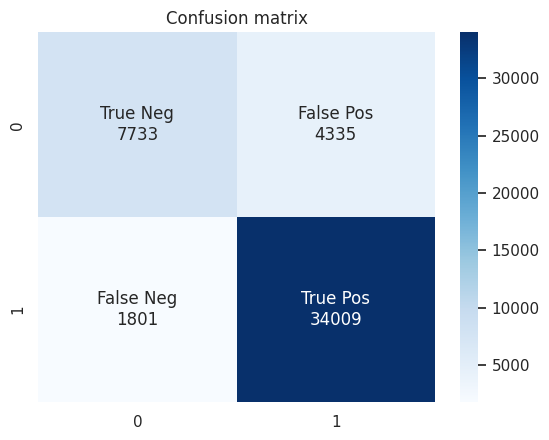

In [38]:
## Plotting confusion matrix
plot_confusion_matrix(confusion_train)

### Confusion Matrix for Test Dataset:

In [39]:
# Confusion matrix
confusion_test =metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_test)

[[ 2359  1734]
 [  549 11318]]


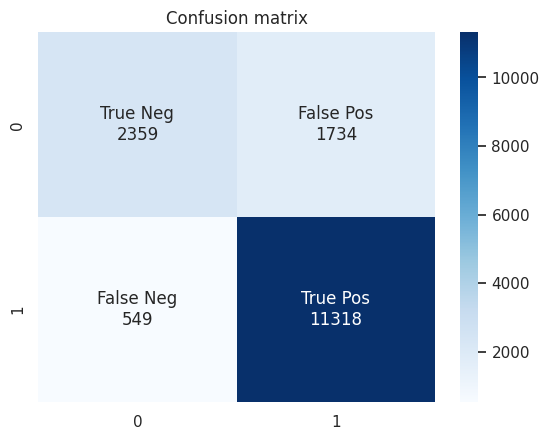

In [40]:
## P|lotting confusion matrix
plot_confusion_matrix(confusion_test)

### Calculating all other metrics:

In [41]:
## For train dataset
TN_train = confusion_train[0, 0]
FP_train = confusion_train[0, 1]
FN_train = confusion_train[1, 0]
TP_train = confusion_train[1, 1]

In [42]:
## For test datset
TN_test = confusion_test[0, 0]
FP_test = confusion_test[0, 1]
FN_test = confusion_test[1, 0]
TP_test = confusion_test[1, 1]

### Sensitivity Metrics:

In [43]:
## Calculating sensitivity for train and test datasets
sensitivity_train = TP_train / float(FN_train + TP_train)
sensitivity_test = TP_test / float(FN_test + TP_test)
print("Sensitivity on train dataset:",round(sensitivity_train,4))
print("Sensitivity on test dataset:",round(sensitivity_test,4))

Sensitivity on train dataset: 0.9497
Sensitivity on test dataset: 0.9537


### Specificity Metrics:

In [44]:
specificity_train = TN_train / float(TN_train + FP_train)
specificity_test = TN_test / float(TN_test + FP_test)
print("Specificity on train dataset:",round(specificity_train,4))
print("Specificity on train dataset:",round(specificity_test,4))

Specificity on train dataset: 0.6408
Specificity on train dataset: 0.5763


### Precision Metrics:

In [45]:
precision_train = TP_train / float(TP_train + FP_train)
precision_test = TP_test / float(TP_test + FP_test)
print("Precision on train dataset:",round(precision_train,4))
print("Precision on test dataset:",round(precision_test,4))

Precision on train dataset: 0.8869
Precision on test dataset: 0.8671


### Recall Metrics:

In [46]:
print("Recall score on train dataset :",round(metrics.recall_score(y_train, y_pred_train),4))
print("Recall score on test dataset :", round(metrics.recall_score(y_test, y_pred_class),4))

Recall score on train dataset : 0.9497
Recall score on test dataset : 0.9537


### F1-Score:

In [47]:
print("F1-Score for train dataset :",round(metrics.f1_score(y_train, y_pred_train),4))
print("F1-Score for test dataset :",round(metrics.f1_score(y_test, y_pred_class),4))

F1-Score for train dataset : 0.9173
F1-Score for test dataset : 0.9084


In [48]:
## Predicted values
y_pred_class

array([1, 1, 1, ..., 1, 1, 1])

In [49]:
## Predicted Probablities
y_pred_proba

array([[2.83164298e-04, 9.99716836e-01],
       [2.23294509e-08, 9.99999978e-01],
       [3.12956701e-20, 1.00000000e+00],
       ...,
       [2.98936109e-01, 7.01063891e-01],
       [5.86064630e-02, 9.41393537e-01],
       [1.89862384e-01, 8.10137616e-01]])

### ROC Curve:

In [50]:
## Creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt

In [51]:
## For train dataset
false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, y_pred_proba_tr[:,1])
roc_auc_tr = auc(false_positive_rate_tr, true_positive_rate_tr)

In [52]:
## For test dataset
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [53]:
# area under the curve
print(roc_auc)

0.9002999816909586


In [54]:
# Dataframe of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds,
              'TPR': true_positive_rate,
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.093621,0.004398
2,1.000000e+00,0.094464,0.004398
3,1.000000e+00,0.096739,0.004642
4,1.000000e+00,0.097413,0.004642
...,...,...,...
3210,2.966828e-55,0.999831,0.999511
3211,4.039258e-56,0.999916,0.999511
3212,2.304121e-79,0.999916,0.999756
3213,8.596947e-86,1.000000,0.999756


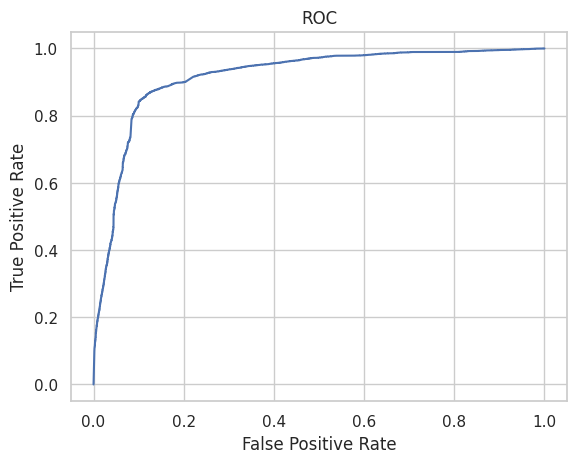

In [56]:
## Plotting the ROC curve for train set
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate_tr, true_positive_rate_tr)
plt.show()

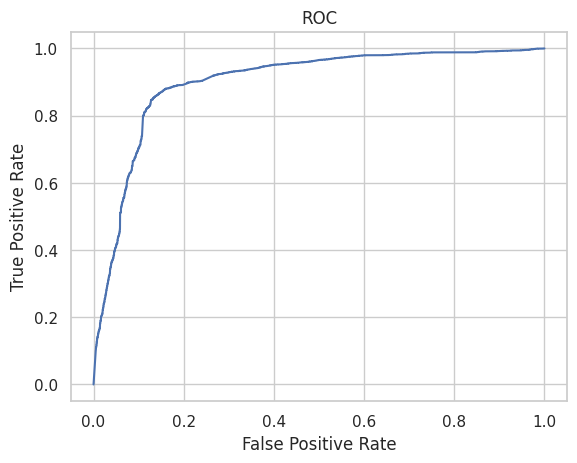

In [58]:
## Plotting the ROC curve for test set
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.show()

**Metrics Values:**
* **Metrics of Model of train and test dataset are** :
* **Train Dataset** :accuracy(87%),sensitivity (95%),specificity(64%),precision(88%),recall (95%),F1 score(92%).
                     
* **Test Dataset** : accuracy(86%),sensitivity (95%),specificity(59%),precision(87%),recall (95%),F1 score(91%), Area under curve(90%)

                     

**Insights:**
* *Since the distribution of the dataset is imbalanced with more positives, many reviews which were negative were incorrectly classified as positives by the NB model and hence the **low specificity**.*
* *From a business point of view, this is not a very good model since you will miss out on the negatives of your competitors. Knowing the weaknesses of your competitors will help you design better features for the product and not make the same mistakes your competitors have already made.*

In [59]:
## Printing the classification report
print("report for train set")
print(classification_report(y_train, y_pred_train))
print("report for test set")
print(classification_report(y_test, y_pred_class))

report for train set
              precision    recall  f1-score   support

           0       0.81      0.64      0.72     12068
           1       0.89      0.95      0.92     35810

    accuracy                           0.87     47878
   macro avg       0.85      0.80      0.82     47878
weighted avg       0.87      0.87      0.87     47878

report for test set
              precision    recall  f1-score   support

           0       0.81      0.58      0.67      4093
           1       0.87      0.95      0.91     11867

    accuracy                           0.86     15960
   macro avg       0.84      0.77      0.79     15960
weighted avg       0.85      0.86      0.85     15960



## **Model 2: With Oversampling**:

**Methodology:**
*We have shown the reason for the bias in the previous model and propose to alleviate the problem by using a method called Random oversampling. Random oversampling involves randomly selecting samples from the minority class (in our case 0s), with replacement, and adding them to the training dataset such that there is an equal distribution of the classes.*

In [60]:
## Splitting the data into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [61]:
pd.Series(y_train).value_counts()

1    35810
0    12068
Name: review_sentiment, dtype: int64

####**NOTE:**
* Oversampling is applied only for Training Dataset.
* Since, if both the train and test data are oversampled, we may end up having same points in both the sets.
* Hence the model performance obtained cannot be reliable as the test set is not independent of the train set.

In [62]:
## Importing Random Sampling Functions
from imblearn import over_sampling
ros = over_sampling.RandomOverSampler(random_state=0)

In [63]:
X_train, y_train = ros.fit_resample(pd.DataFrame(X_train), pd.Series(y_train))

In [64]:
pd.Series(y_train).value_counts()

1    35810
0    35810
Name: review_sentiment, dtype: int64

In [65]:
## Distribution of the data in terms of proportions can now be seen as 50 -50
print("Percent of 1s: ", 100*pd.Series(y_train).value_counts()[1]/pd.Series(y_train).value_counts().sum(), "%")
print("Percent of 0s: ", 100*pd.Series(y_train).value_counts()[0]/pd.Series(y_train).value_counts().sum(), "%")

Percent of 1s:  50.0 %
Percent of 0s:  50.0 %


In [66]:
## Vectorizing the sentences
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [67]:
# The CountVectorizer object, vect takes in a list of string as an argument. to get a list of string from a 2D array,
# we convert the 2D array to a dataframe and then convert it to a list.

X_train = pd.DataFrame(X_train).iloc[:,0].tolist()

#Printing a few samples from the list
X_train[:6]

['excellent phone',
 'product good find problem screen',
 'excelente',
 '',
 'phone work great come headphones star better software stability star software issue phone randomly power drain signifigant amount battery days sometimes touch screen erratic bug bug input method change keyboard power specifically change input method else wish phone android annoy bug fix',
 'device stop camera disaster bad buy sincerely juan croquer caracas venezuela august']

In [68]:
## Fitting X_train into a vectorizer
vect.fit(X_train)

CountVectorizer()

In [69]:
## Transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

### Naive Bayes model with random oversampling:

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [71]:
## Training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# Training dataset
y_pred_train = mnb.predict(X_train_transformed)
y_pred_proba_tr = mnb.predict_proba(X_train_transformed)

# Testing dataset
y_pred = mnb.predict(X_test_transformed)
y_pred_proba = mnb.predict_proba(X_test_transformed)

In [72]:
# note that alpha=1 is used by default for smoothing
mnb

MultinomialNB()

### Model evauation on Test dataset:

In [73]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [76]:
## Printing the overall accuracy
from sklearn import metrics
print("Accuracy for test set is: ", round(metrics.accuracy_score(y_test, y_pred),4))
print("Accuracy for train set is: ", round(metrics.accuracy_score(y_train, y_pred_train),4))

Accuracy for test set is:  0.8586
Accuracy for train set is:  0.8698


Confusion matrix for train and test set


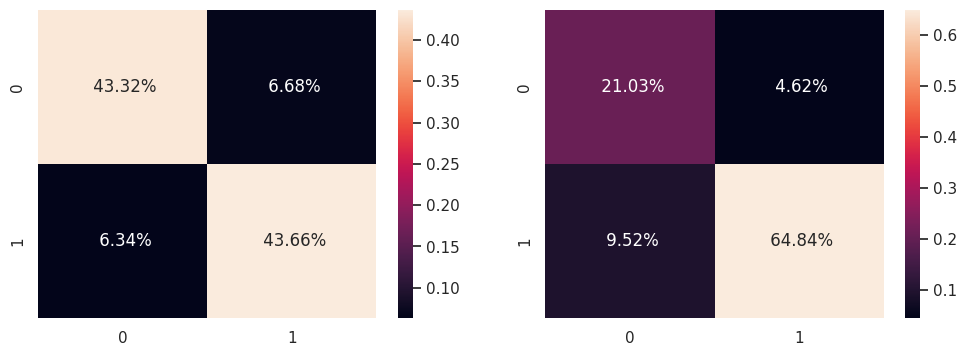

In [77]:
## Confusion matrix for the train data
import seaborn as sns
import matplotlib.pyplot as plt

print("Confusion matrix for train and test set")

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
# confusion matrix for train set
cm_train = metrics.confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train/np.sum(cm_train), annot=True , fmt = ' .2%')
# help(metrics.confusion_matrix)

plt.subplot(1,2,2)
# confusion matrix for the test data
cm_test = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test/np.sum(cm_test), annot=True , fmt = ' .2%')

plt.show()

In [78]:
## Creating an ROC curve
## from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#for test set
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
#for train set
false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, y_pred_proba_tr[:,1])
roc_auc_tr = auc(false_positive_rate, true_positive_rate)

In [84]:
# area under the curve
print ("for train set: ",round(roc_auc_tr,4))
print ("for test set: ",round(roc_auc,4))

for train set:  0.8998
for test set:  0.8998


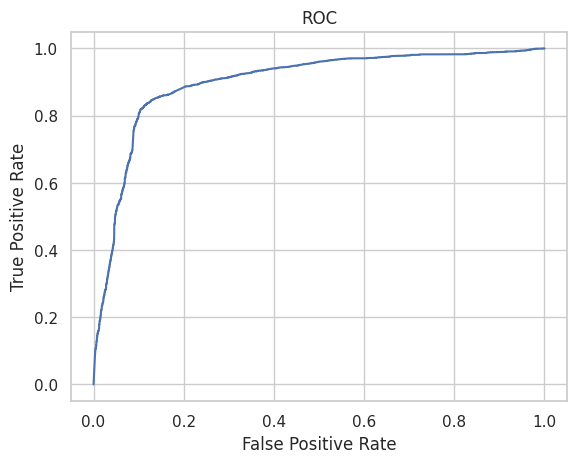

In [85]:
# plotting the ROC curve for test set
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.show()

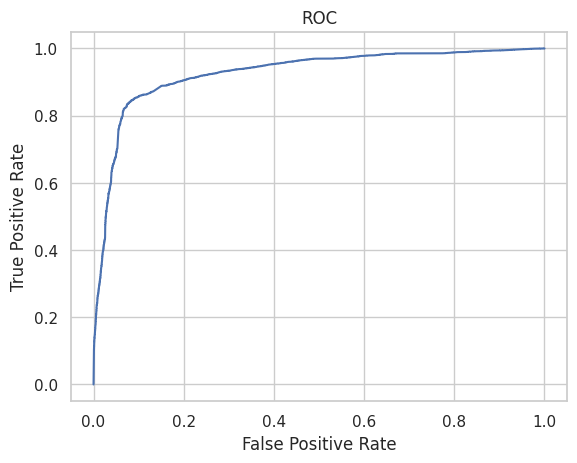

In [86]:
# plotting the ROC curve for train set
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate_tr, true_positive_rate_tr)
plt.show()

In [87]:
# storing the values in variables
#for test set
TN = cm_test[0, 0]
FP = cm_test[0, 1]
FN = cm_test[1, 0]
TP = cm_test[1, 1]
#For train set
TN_tr = cm_train[0, 0]
FP_tr = cm_train[0, 1]
FN_tr = cm_train[1, 0]
TP_tr = cm_train[1, 1]

In [90]:
#specificity for test and train set.
specificity_tr = TN_tr / float(TN_tr + FP_tr)
print("specificity for train set: ",round(specificity_tr,4))
specificity = TN / float(TN + FP)
print("specificity for test set: ",round(specificity,4))

specificity for train set:  0.8665
specificity for test set:  0.8199


In [96]:
#Calculating the Sensitivity for train and test set
sensitivity_tr = TP_tr / float(FN_tr + TP_tr)
print("sensitivity for train set: ",round(sensitivity_tr,4))
sensitivity = TP / float(FN + TP)
print("sensitivity for test set: ",round(sensitivity,4))

sensitivity for train set:  0.8732
sensitivity for test set:  0.872


**Metrics Values:**
* **Metrics of Model of train and test dataset are** :
* **Train Dataset** : accuracy(88%),sensitivity (88%),specificity(87%).
                     
* **Test Dataset** : accuracy(89%),sensitivity (87%),specificity(82%),Area under curve(90%)

**Insights:**
* The test sensitivity and specificity of the model without oversampling were 0.95 and 0.59 respectively.
* The application of oversampling model has resulted in an equal distribution of the binary labels.
* This model is  much better than the one that was built without oversampling.
* Thus, we can say that this Model predicts the sentiment of a review with assurity and will help us in classifying the sentiment of new reviews in real time.